#### 5.Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.¶

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv("../week13repo/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

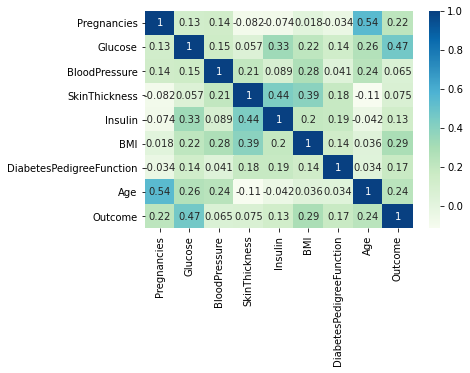

In [34]:
# Visualize correlation between the columns

sns.heatmap(diabetes_df.corr(), cmap="GnBu",
            annot=True, fmt='.2g', linewidths=0, linecolor='white', 
            cbar=True)

#### Visualizing Distribution of the Data

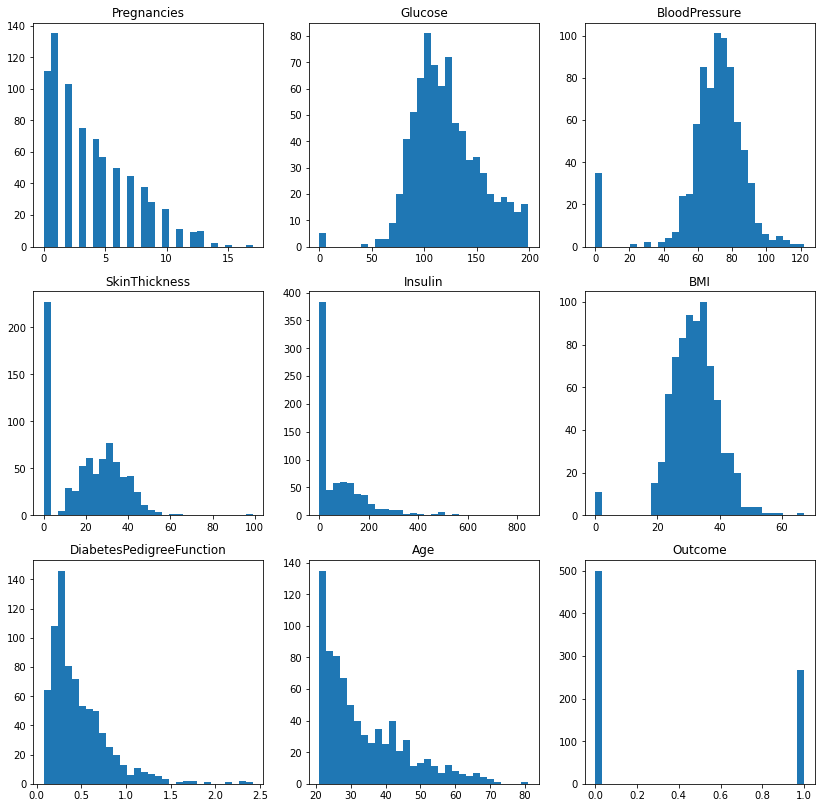

In [106]:
import matplotlib.pyplot as plt


# Making a list of col names:
cols = diabetes_df.columns.tolist()

fig = plt.figure(figsize=(14,14))
for position, col in enumerate(cols):
    ax = fig.add_subplot(3,3,position+1)
    ax.hist(diabetes_df[col], bins=30)
    plt.title(col)

plt.show()

Some columns, like BMI and BloodPressure look normally distributed.

One thing that stands out to us is that there are values in the Insulin, and SkinThickness columns that are zero.

Because realistically the values of these things could not possibly be 0 for a person, it likely means that the data in that row was either recorded incorrectly, or not recorded at all.

Let's also visualize the distribution of the data based on whether a person had diabetes.

#### Visualizing distribution of Data based on Diabetes outcome

In [108]:
with_diabetes = diabetes_df[diabetes_df['Outcome'] == 1]
without_diabetes = diabetes_df[diabetes_df['Outcome'] == 0]

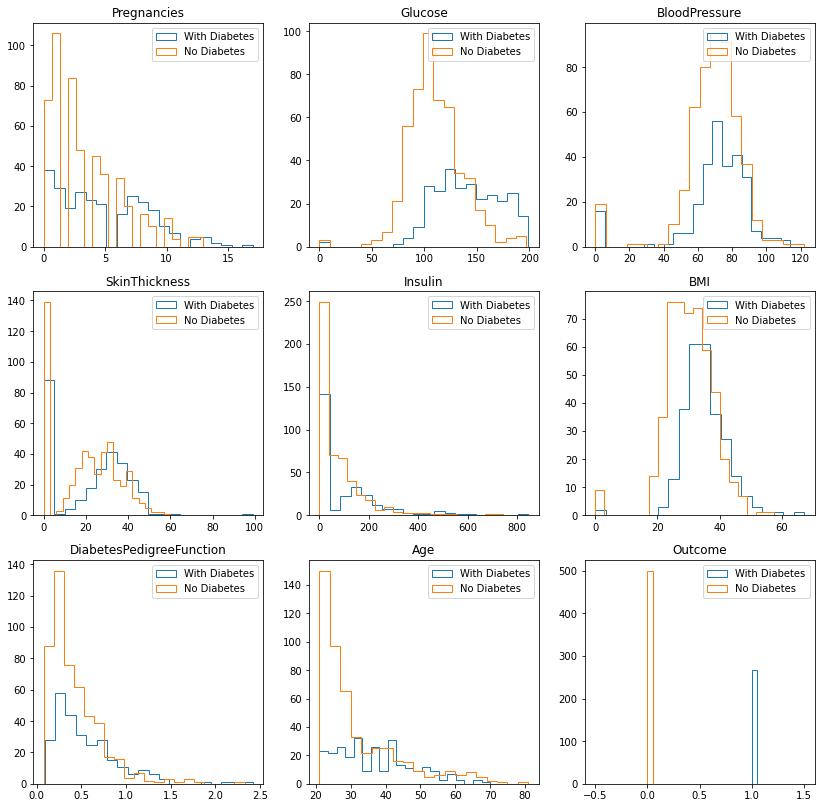

In [109]:
fig = plt.figure(figsize=(14,14))
for position, col in enumerate(cols):
    ax = fig.add_subplot(3,3,position+1)
    ax.hist(with_diabetes[col], histtype ='step', label='With Diabetes', bins = 20)
    ax.hist(without_diabetes[col], histtype ='step', label = 'No Diabetes', bins=20)
    ax.legend(loc=0)
    plt.title(col)

plt.show()

In [16]:
x =diabetes_df.drop("Outcome",axis="columns")
y = diabetes_df["Outcome"]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\sachn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,10,101,76,48,180,32.9,0.171,63
555,7,124,70,33,215,25.5,0.161,37
551,3,84,68,30,106,31.9,0.591,25
765,5,121,72,23,112,26.2,0.245,30
275,2,100,70,52,57,40.5,0.677,25
...,...,...,...,...,...,...,...,...
704,4,110,76,20,100,28.4,0.118,27
725,4,112,78,40,0,39.4,0.236,38
452,0,91,68,32,210,39.9,0.381,25
322,0,124,70,20,0,27.4,0.254,36


In [132]:
predict = model.predict(x_test)

In [133]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predict,y_test))

0.7874015748031497


In [68]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=8)
KN.fit(X_train,y_train)
yhat=KN.predict(X_test)
print(accuracy_score(predict,y_test))

0.7987012987012987


In [69]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
accuracy_score(predict,y_test)

0.7987012987012987

In [70]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
accuracy_score(predict,y_test)

0.7987012987012987

In [71]:
from sklearn import svm
clf=svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
accuracy_score(predict,y_test)

0.7987012987012987

In [73]:
from sklearn import svm
clf=svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
yhat=clf.predict(X_test)
accuracy_score(predict,y_test)

0.7987012987012987

In [62]:
model.score(x_test,y_test)

0.7987012987012987

In [22]:
x_test["Predict diabetes"] = predict

<ipython-input-22-a480e5fd3889>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Predict diabetes"] = predict


In [23]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predict diabetes
673,3,123,100,35,240,57.3,0.880,22,1
216,5,109,62,41,129,35.8,0.514,25,0
21,8,99,84,0,0,35.4,0.388,50,0
340,1,130,70,13,105,25.9,0.472,22,0
230,4,142,86,0,0,44.0,0.645,22,1
...,...,...,...,...,...,...,...,...,...
182,1,0,74,20,23,27.7,0.299,21,0
69,4,146,85,27,100,28.9,0.189,27,0
225,1,87,78,27,32,34.6,0.101,22,0
237,0,179,90,27,0,44.1,0.686,23,1


(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6073528461588164, 0.8906481939633843),
  ('0', '1'): (0.0,
   0.893970453099597,
   0.6073528461588164,
   0.10602954690040295),
  ('1', '0'): (0.6123279705369258,
   0.0,
   0.3876720294630743,
   0.34883720930232553),
  ('1', '1'): (0.6123279705369258,
   0.3521594684385382,
   0.3876720294630743,
   0.6478405315614618)})

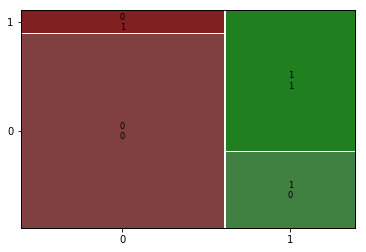

In [77]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(cm)

In [30]:
import sklearn.metrics

sklearn.metrics.accuracy_score(y_test, predict)

0.8311688311688312

In [35]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,predict)
cm

array([[98, 10],
       [16, 30]], dtype=int64)

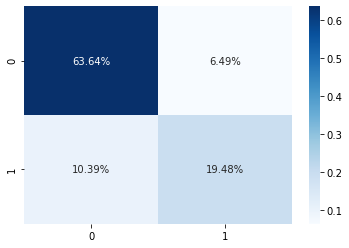

In [41]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues',)
plt.show()

#### 0 means diabetic and 1 means nondiabetic

#### 6.What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

### Precision
 
When it predicts yes, how often is it correct?

Precision=TP/predicted yes

When we have a class imbalance, accuracy can become an unreliable metric for measuring our performance that time we use Pricision.

### F1 Score
 
The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

### Recall or Sensitivity
 
When it’s actually yes, how often does it predict yes?

True Positive Rate = TP/actual yes

Recall gives us the true positive rate (TPR), which is the ratio of true positives to everything positive.

In [121]:
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [134]:
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
model = LogisticRegression()

dat = diabetes_df.values
x = dat[:,:-1]
y = dat[:,-1]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7

#split data

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)
model.fit(x_train, y_train)

precision = precision_score(predict, y_test)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(predict, y_test)
print('Recall: %f' % recall)

# f1: tp / (tp + fp + fn)
f1 = f1_score(predict, y_test)
print('F1 score: %f' % f1)

Precision: 0.630435
Recall: 0.743590
F1 score: 0.682353


C:\Users\sachn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
with_diabetes= diabetes_df.loc[diabetes_df['Outcome']==1]

In [111]:
len(truediabetes)

500

In [112]:
with_diabetes.mean()

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
Outcome                       1.000000
dtype: float64

In [113]:
without_diabetes= diabetes_df.loc[diabetes_df['Outcome']==0]

In [114]:
len(falsediabetes)

268

In [115]:

without_diabetes.mean()

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
Outcome                       0.000000
dtype: float64

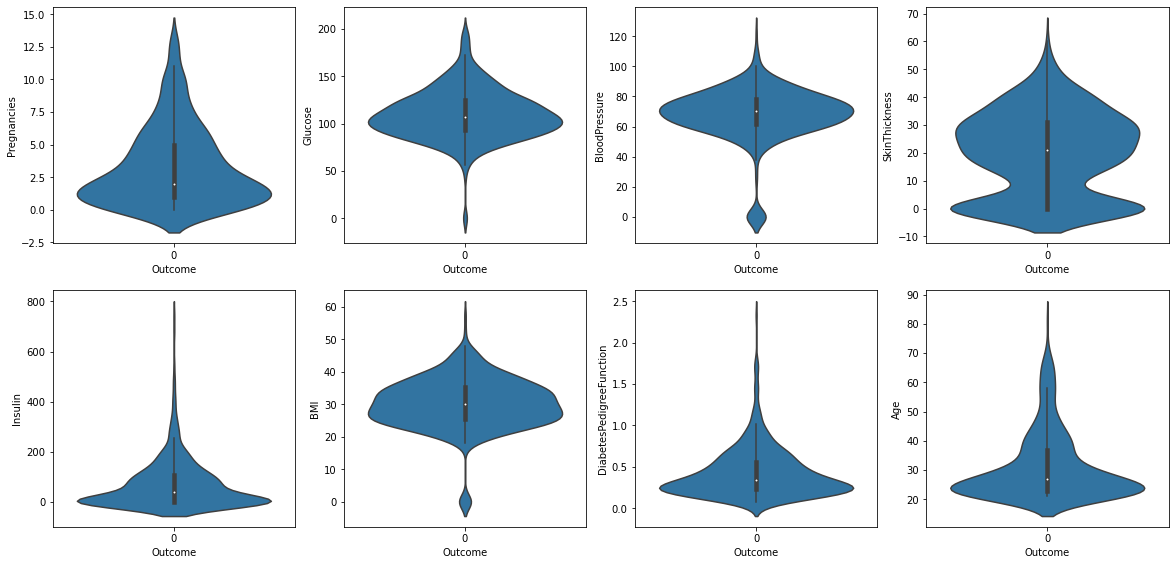

In [116]:
import seaborn as sns
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(without_diabetes.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.violinplot(x='Outcome', y=column, data=without_diabetes)

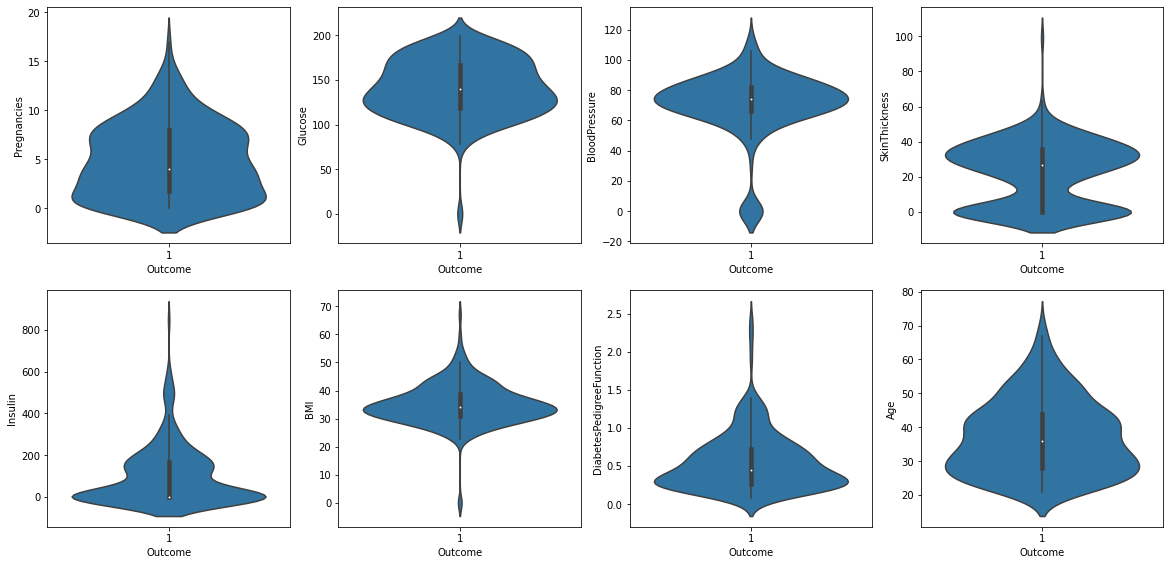

In [117]:
plt.figure(figsize=(20, 20))

for column_index, column in enumerate(with_diabetes.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.violinplot(x='Outcome', y=column, data=with_diabetes)

#### 7.Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [79]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0]


In [81]:
print(knn.score(X_test, y_test))

0.7057291666666666


In [ ]:
multiple logistic regression model is more performant rather than KNN.
because the accuracy with multiple logical regression modelis more than KNN model.
accuracy of multiple logistic regression model is 0.79 and 
accuracy of KNN model is 0.70
